In [2]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 3

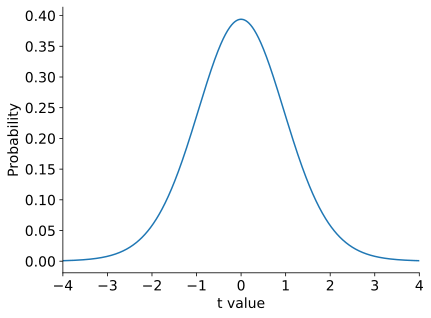

In [3]:
# one t-value distribution
tvals = np.linspace(-4,4,1001)

# compute the pdf
tpdf = stats.t.pdf(tvals,20)

# plot
plt.plot(tvals,tpdf)
plt.xlim(tvals[[0,-1]])
plt.xlabel('t value')
plt.ylabel('Probability')
plt.show()
     


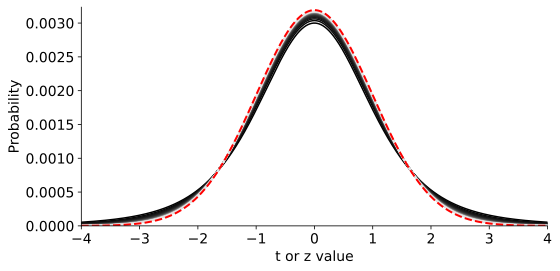

In [4]:
# t-distributions with different df's
tvals = np.linspace(-4,4,1001)
dfs = np.arange(4,41)

# initialize the figure
plt.figure(figsize=(8,4))

# create and show the pdf's
for df in dfs:

  # compute the pdf
  tpdf = stats.t.pdf(tvals,df) * np.diff(tvals[:2])

  # plot
  c = (df-np.min(dfs))/np.max(dfs) # color value with scaling
  plt.plot(tvals,tpdf,color=(c,c,c))


# then plot zscores (using "tvals" as z-values here)
plt.plot(tvals,stats.norm.pdf(tvals)*np.diff(tvals[:2]),'r--',linewidth=2)


plt.ylim([0,np.max(tpdf)*1.02])
plt.xlim(tvals[[0,-1]])
plt.xlabel('t or z value')
plt.ylabel('Probability')

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [5]:
# p-value threshold (corrected)
pThresh = .05

# set of p-values
k = 40
pvals = np.random.uniform(low=.001,high=.3,size=k)**2

# step 1: sort the p-values
pvalsSort = np.sort(pvals)

# step 2: linear interpolated distribution
pvalsInterp = np.arange(1,k+1) / k

# step 3: adjusted p-values
pvals_adjusted = pvalsSort / pvalsInterp

# Using the statsmodel function.
# This function returns a tuple with (0) Boolean rejections and (1) adjusted p-values.
# Here we need only the second output.
qq = fdrcorrection(pvalsSort,pThresh)[1]





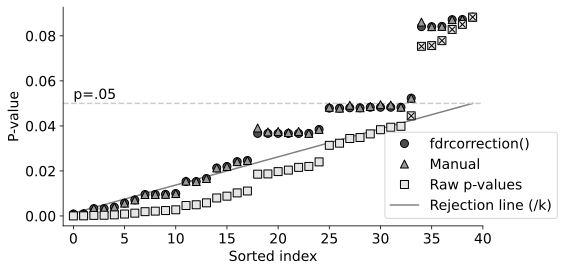

In [6]:
# plot
plt.figure(figsize=(8,4))


plt.plot(qq,'ko',markerfacecolor=(.3,.3,.3),markersize=8,label='fdrcorrection()')
plt.plot(pvals_adjusted,'k^',markerfacecolor=(.6,.6,.6),markersize=8,label='Manual')
plt.plot(pvalsSort,'ks',markerfacecolor=(.9,.9,.9),markersize=8,label='Raw p-values')
plt.plot(pThresh*pvalsInterp,color='gray',label=r'Rejection line (/k)',zorder=-10)
plt.axhline(pThresh,linestyle='--',color=(.8,.8,.8),zorder=-10)
plt.text(0,.052,'p=.05')

# cross out non-significant p-values
plt.plot(np.where(pvals_adjusted>pThresh)[0],pvalsSort[pvals_adjusted>pThresh],'kx')

# labels etc
plt.legend(bbox_to_anchor=[.75,.46])
plt.xlabel('Sorted index')
plt.ylabel('P-value')
plt.xlim([-1,k])

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [7]:
# the p-values that are significant according to FDR correction
H0rejected = pvalsSort <= pvalsInterp*pThresh

# find the largest signficant (raw) pvalue
H0rejected_pvals = np.where(H0rejected)[0]
FDR_threshold = pvalsSort[H0rejected_pvals[-1]]

print(f'Uncorrected p-value threshold based on FDR: q={FDR_threshold:.4f}')

Uncorrected p-value threshold based on FDR: q=0.0398
